In [1]:
!ls

'┴ª6╚╕ L.POINT Big Data Competition'
'┴ª6╚╕ L.POINT Big Data Competition-╡Ñ└╠┼═ ╝│╕φ╝¡.pdf'
'┴ª6╚╕ L.POINT Big Data Competition-╝│╕φ╚╕ └┌╖ß.pdf'
 거래정보.csv
 상품분류정보.csv
 온라인행동정보.csv
 고객demographic정보.csv
 Untitled.ipynb


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df_transaction = pd.read_csv("거래정보.csv")
df_category = pd.read_csv("상품분류정보.csv")
df_activation = pd.read_csv("온라인행동정보.csv")
df_demo = pd.read_csv("고객demographic정보.csv")

/home/aiffel0039/anaconda3/envs/aiffel/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(df_transaction.shape)
df_transaction.head()

(599961, 9)


,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
0,21922,104999,1,A03,unknown,20190920,12:41,5990,1
1,21279,104907,4,A03,unknown,20190920,10:27,10900,1
2,39423,105124,11,A03,unknown,20190920,17:26,12900,1
3,18362,104010,1,A03,unknown,20190920,09:57,9900,1
4,39423,105124,13,A03,0565,20190920,17:26,2990,1


In [4]:
print(df_category.shape)
df_category.head()

(1667, 4)


,pd_c,clac_nm1,clac_nm2,clac_nm3
0,1,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Automobile Oil / Additives
1,2,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Car Lights
2,3,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Car Paint
3,4,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Filters
4,5,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Wiper Blades


In [5]:
print(df_activation.shape)
df_activation.head()

(3196362, 14)


,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm
0,7809,1,8,5,A03,20190913,01:16,2571103,NaN,NaN,34.0,2663.0,DIRECT,NaN
1,7809,1,4,2,A03,20190913,01:14,2485909,NaN,NaN,34.0,2663.0,DIRECT,NaN
2,7809,1,11,5,A03,20190913,01:17,2646597,NaN,NaN,34.0,2663.0,DIRECT,NaN
3,7809,1,1,2,A03,20190913,00:46,788304,NaN,NaN,34.0,2663.0,DIRECT,NaN
4,7809,1,9,5,A03,20190913,01:17,2617609,NaN,NaN,34.0,2663.0,DIRECT,NaN


In [6]:
print(df_demo.shape)
df_demo.head()

(72399, 3)


,clnt_id,clnt_gender,clnt_age
0,1,unknown,unknown
1,2,F,30
2,3,unknown,unknown
3,4,unknown,unknown
4,5,unknown,unknown


## EDA

EDA를 해봅시다!

### 결측치 확인하기

In [7]:
df_activation.isnull().sum()

clnt_id                  0
sess_id                  0
hit_seq                  0
action_type              0
biz_unit                 0
sess_dt                  0
hit_tm                   0
hit_pss_tm               0
trans_id           3139373
sech_kwd           2544724
tot_pag_view_ct       1428
tot_sess_hr_v        57607
trfc_src                 0
dvc_ctg_nm         1782577
dtype: int64

**온라인 행동 정보**

|변수명(영문)|변수명(국문)|상세 설명|
|:--:|:------:|:-----|
|clnt_id|클라이언트 ID|- 고객을 고유하게 식별할 수 있도록 랜덤으로 부여된 ID|
|sess_id|세션 ID|- Web/App에 접속 후 세션이 시작될 때 부여된 순번 ID. <br/>- 하나의 클라이언트 ID에 여러개의 세션 ID가 접속될 수 있다.|
|hit_seq|조회일련번호|- 조회 순서를 알 수 있도록 부여된 일련번호|
|action_type|행동유형|- 총 8가지 행동 유형을 구분한 코드<br/>- 0 : 검색 / 1 : 제품 목록 / 2 : 제품 세부정보 보기 / 3 : 장바구니 제품 추가 / 4 : 장바구니 제품 삭제 / 5 : 결제 시도 / 6 : 구매 완료 / 7 : 구매 환불 / 8 : 결제 옵션|
|biz_unit|업종 단위|- 온라인 및 오프라인 이용처를 구분하는 단위 코드|
|sess_dt|세션 일자|- 세션 일자 (YYYYMMDD 형식으로 표기)|
|hit_tm|조회 시각|- 조회 시각 (HH-MM 형식으로 표기)|
|hit_pss_tm|조회경과시간|- 세션이 시작된 이후 해당 조회까지 경과한 시간(단위 : 밀리초)<br/>- 첫번째 조회면 0으로 설정|
|trans_id|거래 ID|- 구매 내역을 고유하게 식별할 수 있도록 랜덤으로 부여된 ID|
|sech_kwd|검색 키워드|- 고객이 검색한 키워드|
|tot_pag_view_ct|총 페이지 조회 건수|- 세션 내의 총 페이지(화면) 뷰 수|
|tot_sess_hr_v|총 세션 시간 값|- 세션 내 총 시간(단위 : 초)|
|trfc_src|유입 채널|- 고객이 유입된 채널<br/>-  DIRECT / PUSH / WEBSITE / PORTAL_1 / PORTAL_2 / PORTAL_3 / unknown|
|dvc_ctg_nm|기기  유형|- 기기 유형<br/>- mobile_web / mobile_app / PC

우리가 집중해서 봐야할 데이터 프레임입니다. 많은 정보들이 들어있는데, 다른 데이터 프레임의 정보를 이것과 합쳐서 보도록 합시다.

In [8]:
df_transaction.isnull().sum()

clnt_id      0
trans_id     0
trans_seq    0
biz_unit     0
pd_c         0
de_dt        0
de_tm        0
buy_am       0
buy_ct       0
dtype: int64

**거래 정보**

|변수명(영문)|변수명(국문)|상세 설명|
|:--:|:------:|:-----|
|clnt_id|클라이언트 ID|- 고객을 고유하게 식별할 수 있도록 랜덤으로 부여된 ID|
|trans_id|거래 ID|- 구매 내역을 고유하게 식별할 수 있도록 랜덤으로 부여된 ID|
|trans_seq|거래 일련 번호|- 해당 거래 ID의 구매 내역 내 구매 순서를 알 수 있도록 부여된 일련번호|
|biz_unit|업종 단위|- 온라인 및 오프라인 이용처를 구분하는 단위 코드|
|pd_c|상품소분류코드|- 상품의 소분류 코드|
|de_df|구매일자|- 상품을 구매한 일자 (YYYYMMDD 형식)|
|de_tm|구매시각|- 상품을 구매한 시각 (HHMM 형식)|
|buy_am|구매금액|- 구매한 상품의 금액|
|buy_ct|구매수량|- 구매한 상품의 수량|

우리가 주로 봐야할 것은 저 위에 있는 온라인 행동 정보를 나타내는 `df_activation` 데이터 프레임이 될 것 같습니다. 이 데이터에 다른 데이터 프레임의 정보를 merge하는 방식을 취해줄 거에요.

그런데 거래정보에서 약간의 특이점이 있는 것 같습니다. 온라인 행동 정보에는 `trans_id`에 결측치가 보이는데 거래정보는 그렇지가 않아요. 아마도 온라인 행동 정보에는 구매하지 않고 그냥 검색만 한다던가, 제품을 보기만 해서 그럴 수 있을 것 같습니다. 어쨌든 이 데이터는 더해주도록 합시다!

In [9]:
df_demo.isnull().sum()

clnt_id        0
clnt_gender    0
clnt_age       0
dtype: int64

**고객 Demographic 정보**

|변수명(영문)|변수명(국문)|상세 설명|
|:--:|:------:|:-----|
|clnt_id|클라이언트 ID|- 고객을 고유하게 식별할 수 있도록 랜덤으로 부여된 ID|
|clnt_gender|성별|- 성별 정보(남자 : M / 여자 : F / 정보 없음 : unknown)|
|clnt_age|연령대|- 연령대 정보 <br/>- 10대 이하/ 20대 / 30대 / 40대 / 50대 / 60대 이상 / 정보 없음 :unknown|

여기서는 unknown이라는 값이 계속 보이네요. 얘만 따로 한번 이따가 확인해줍시다.

In [10]:
df_category.isnull().sum()

pd_c        0
clac_nm1    0
clac_nm2    0
clac_nm3    2
dtype: int64

**상품 분류 정보**

|변수명(영문)|변수명(국문)|상세 설명|
|:--:|:------:|:-----|
|pd_c|상품 소분류코드|- 상품의 소분류코드(최소단위)|
|clac_nm1|상품 대분류명|- 상품 대분류명|
|clac_nm2|상품 중분류명|- 상품 중분류명|
|clac_nm3|상품 소분류명|- 상품 소분류명|

여기까지 잘 확인할 수 있었습니다! 이제 데이터의 분포를 한번 살펴봅시다.

### 데이터 분포 확인하기

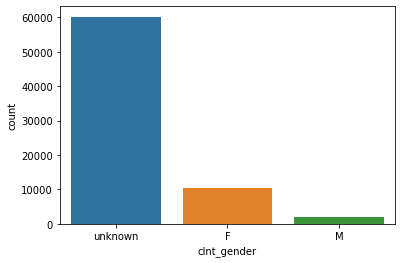

In [11]:
import seaborn as sns

sns.countplot(df_demo['clnt_gender'])
plt.show()

먼저 고객들의 성별 정보부터 한번 확인해보았습니다. 일단 unknown이 압도적으로 많고, 여자와 남자를 비교했을 때 여자가 훨씬 많네요.

주 고객층은 여성이 될 것 같습니다.

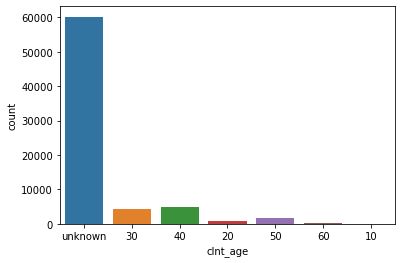

In [12]:
sns.countplot(df_demo['clnt_age'])
plt.show()

이번에는 연령대별 정보를 한번 확인해보았습니다. 여기서도 마찬가지로 unknown이 가장 많고 40대, 30대, 50대 순으로 많네요. 10대는 많이 없어 보입니다.

In [13]:
df_category['clac_nm1'].nunique()

60

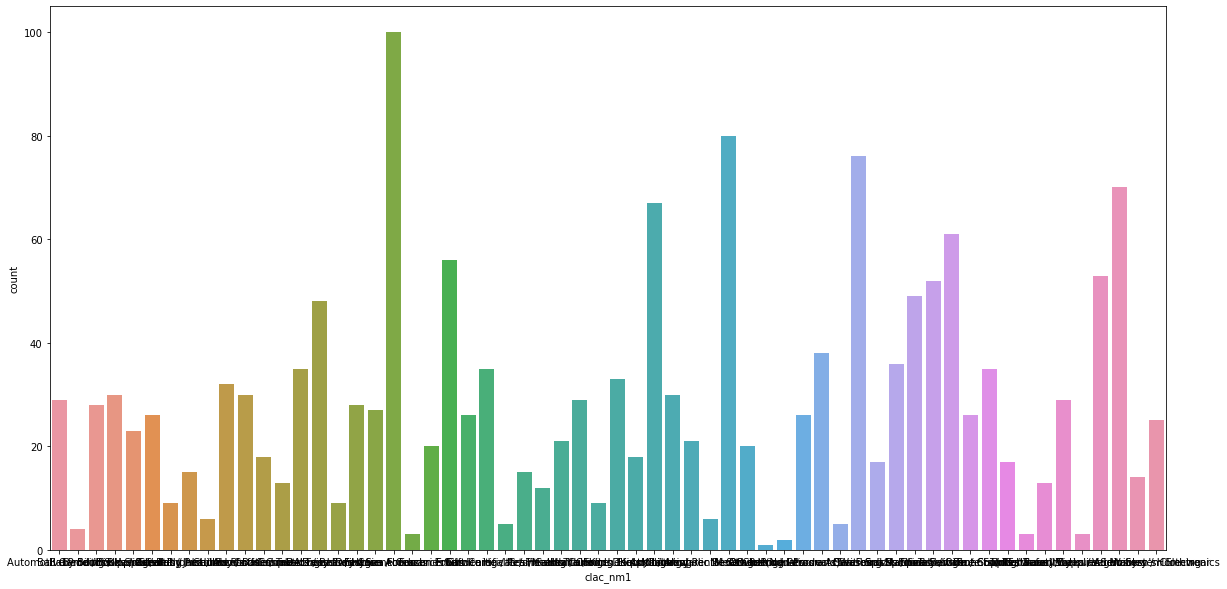

In [14]:
plt.figure(figsize=(20, 10))
sns.countplot(df_category['clac_nm1'])
plt.show()

상품 카테고리의 분류도 어떤건 많고, 어떤건 적네요. 

In [15]:
print(df_category['clac_nm1'].unique())

['Automotive Products' 'Baby Foods' 'Ball Game / Field Sports'
 'Bedding / Handicraft' 'Beverages' 'Birth Supplies / Baby Products'
 'Books / Records / Instruments' 'Canned / Jarred Foods'
 'Cell Phones / Accessories' 'Chilled Foods'
 'Cleaning / Laundry / Bathroom Accessories' 'Coffee / Tea' 'Computers'
 'Cooked Foods' 'Cosmetics / Beauty Care' 'Dairy Products'
 'Detergents / Hygiene Goods' 'Dried Sea Foods' 'Fashion Accessories'
 'Finance / Insurance Service' 'Frozen Foods' 'Fruits' 'Furniture'
 'Gardening / Pets' 'Gift Certificates / Cards' 'Grains'
 'Health / Fitness Training' 'Health Care' 'Health Foods'
 'Heating / Cooling Electronics' 'Home / Kitchen Appliances'
 'Home Decor / Lighting' "Kids' Clothing" 'Kitchenware'
 'Liquors / Alcoholic Beverages' 'Living / Rental Services' 'Meats'
 "Men's Clothing" 'Other Products' 'Others (Non-Products)'
 'Outdoor / Leisure Activities' 'Personal Care'
 'Refrigerators and Washing Machines' 'Sea Foods' 'Seasonal Sports'
 'Snack Foods' 'Spices 

이런 데이터들이 있는데.. 지금은 일단 대분류만 확인해도 나쁘지 않을 것 같다는 생각이 듭니다. 

In [16]:
df_transaction.head()

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
0,21922,104999,1,A03,unknown,20190920,12:41,5990,1
1,21279,104907,4,A03,unknown,20190920,10:27,10900,1
2,39423,105124,11,A03,unknown,20190920,17:26,12900,1
3,18362,104010,1,A03,unknown,20190920,09:57,9900,1
4,39423,105124,13,A03,0565,20190920,17:26,2990,1


In [17]:
print(df_transaction['biz_unit'].unique())

['A03' 'B01' 'B02' 'A02' 'A01' 'B03']


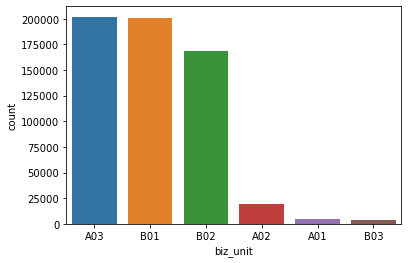

In [18]:
sns.countplot(df_transaction['biz_unit'])
plt.show()

`biz_unit`은 업종 분류 번호를 뜻하는 칼럼입니다. 정확히 무엇을 의미하는지는 모르겠지만 6개의 종류가 있고 `A03`, `B01`이 가장 많네요.

In [19]:
df_transaction['pd_c'].nunique()

1668

In [20]:
df_transaction['pd_c'].value_counts()

unknown    17652
1213       15518
0347       12914
0964       11115
1395       11083
           ...  
0655           1
1349           1
1353           1
1631           1
1323           1
Name: pd_c, Length: 1668, dtype: int64

상품 소분류를 뜻하는 `pd_c`에는 대부분이 unknown이라는 것을 확인할 수 있습니다. 

이 unknown 데이터는 어떻게 처리해주는 것이 좋을까요? 일단 다른 데이터들을 보고 생각해볼까요?

In [21]:
df_transaction['date'] = df_transaction['de_dt'].astype(str) + " " + df_transaction['de_tm']
df_transaction.head()

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct,date
0,21922,104999,1,A03,unknown,20190920,12:41,5990,1,20190920 12:41
1,21279,104907,4,A03,unknown,20190920,10:27,10900,1,20190920 10:27
2,39423,105124,11,A03,unknown,20190920,17:26,12900,1,20190920 17:26
3,18362,104010,1,A03,unknown,20190920,09:57,9900,1,20190920 09:57
4,39423,105124,13,A03,0565,20190920,17:26,2990,1,20190920 17:26


In [22]:
df_transaction['date'] = pd.to_datetime(df_transaction['date'], format="%Y%m%d %H:%M")

In [23]:
df_transaction['de_dt'].unique()

array([20190920, 20190921, 20190922, 20190923, 20190924, 20190925,
       20190913, 20190914, 20190916, 20190915, 20190917, 20190926,
       20190918, 20190919, 20190802, 20190805, 20190803, 20190801,
       20190806, 20190807, 20190804, 20190808, 20190810, 20190809,
       20190811, 20190812, 20190901, 20190902, 20190905, 20190906,
       20190904, 20190907, 20190908, 20190903, 20190909, 20190911,
       20190910, 20190912, 20190813, 20190816, 20190814, 20190817,
       20190819, 20190815, 20190818, 20190820, 20190822, 20190821,
       20190823, 20190730, 20190729, 20190723, 20190731, 20190725,
       20190726, 20190724, 20190727, 20190728, 20190701, 20190706,
       20190702, 20190708, 20190704, 20190709, 20190703, 20190710,
       20190705, 20190707, 20190711, 20190824, 20190827, 20190828,
       20190826, 20190825, 20190829, 20190830, 20190831, 20190927,
       20190928, 20190929, 20190930, 20190712, 20190713, 20190716,
       20190719, 20190717, 20190718, 20190714, 20190715, 20190

데이터를 보아하니 2019년 7월, 8월, 9월 데이터인 것 같습니다.

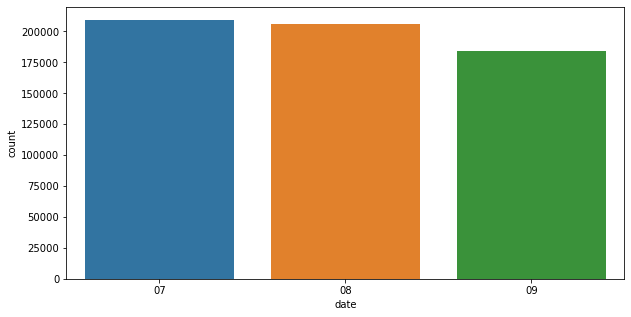

In [24]:
plt.figure(figsize=(10, 5))
sns.countplot(df_transaction['date'].dt.strftime('%m'))

월별 데이터는 골고루 있는 것 같습니다. 날짜별로도 한번 확인해봅시다.

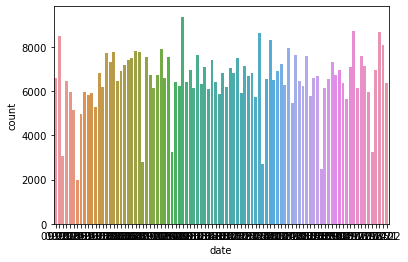

In [25]:
sns.countplot(df_transaction['date'].dt.strftime('%m %d'))

날짜별 transaction 분포를 보면 언제는 되게 낮게 나오고, 언제는 되게 높게 나옵니다. 이것도 자세히 나중에 확인할 필요가 있을 것 같습니다.

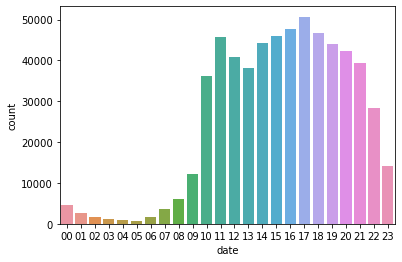

In [26]:
sns.countplot(df_transaction['date'].dt.strftime("%H"))

시간대별 transaction의 결과는 명확합니다. 오전 10시부터 21시까지의 결과가 높은 것을 확인할 수 있습니다.

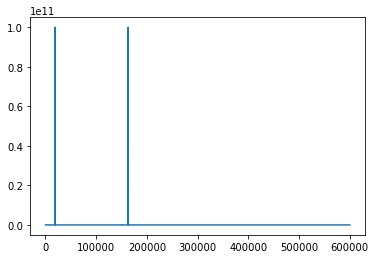

In [27]:
df_transaction['buy_am'].plot()

`buy_am`은 상품의 가격이 얼마인지를 나타내는 것입니다. 특이한 그래프가 그려졌으니 한번 값을 확인해볼까요?

In [28]:
df_transaction['buy_am'].value_counts()

2990      18064
1000      16200
1990      15745
3990      14652
990       14087
          ...  
969000        1
150200        1
113350        1
39650         1
4094          1
Name: buy_am, Length: 14810, dtype: int64

In [29]:
df_transaction['buy_ct'].value_counts()

1      497831
2       62837
3       12371
0        6775
4        6377
        ...  
210         1
207         1
717         1
204         1
155         1
Name: buy_ct, Length: 338, dtype: int64

물건은 당연히 한개만 산 것이 많겠죠? ㅎㅎ

이제 온라인 행동 정보를 한번 살펴봅시다.

In [30]:
df_activation.head()

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm
0,7809,1,8,5,A03,20190913,01:16,2571103,NaN,NaN,34.0,2663.0,DIRECT,NaN
1,7809,1,4,2,A03,20190913,01:14,2485909,NaN,NaN,34.0,2663.0,DIRECT,NaN
2,7809,1,11,5,A03,20190913,01:17,2646597,NaN,NaN,34.0,2663.0,DIRECT,NaN
3,7809,1,1,2,A03,20190913,00:46,788304,NaN,NaN,34.0,2663.0,DIRECT,NaN
4,7809,1,9,5,A03,20190913,01:17,2617609,NaN,NaN,34.0,2663.0,DIRECT,NaN


#### `action_type`

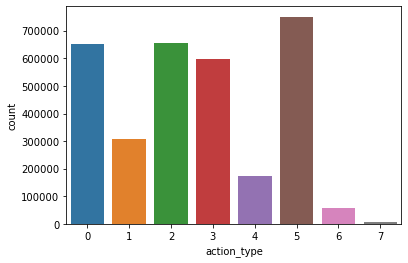

In [31]:
sns.countplot(df_activation['action_type'])

먼저 `action_type`부터 확인해봅시다. 이것은 8가지 행동 유형을 구분한 코드를 나타냅니다.

- 0 : 검색
- 1 : 제품 목록
- 2 : 제품 세부 정보 보기
- 3 : 장바구니 제품 추가
- 4 : 장바구니 제품 삭제
- 5 : 결제 시도
- 6 : 구매 완료
- 7 : 구매 환불
- 8 : 결제 옵션

보면 결제 옵션을 선택한 것은 하나도 없나보네요. 결제를 시도한 것은 많은데, 구매 완료까지 간 것은 또 많지 않습니다. 그 외에는 제품을 검색하고 세부 정보를 보고 장바구니에 제품 추가까지 한 것이 많습니다. 

다른 칼럼들도 한번 살펴봅시다.

#### `biz_unit`

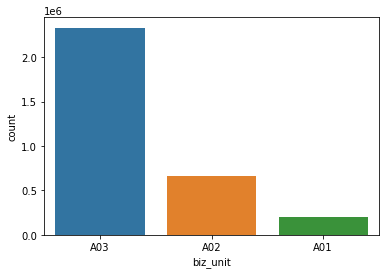

In [32]:
sns.countplot(df_activation['biz_unit'])

온라인 행동정보에서는 세가지 업종 단위만 있네요. A01, A02, A03입니다.

온라인 및 오프라인 이용처를 구분하는 단위 코드인데, 무엇이 온라인이고 오프라인인지는 한눈에 확인할 수는 없네요. 지레짐작이지만 가장 많은 수가 나온 A03이 온라인이 될 것 같습니다.

#### `sech_kwd`


In [33]:
df_activation['sech_kwd'].value_counts()

우유            8985
두부            5210
계란            5039
생수            4283
수박            2694
              ... 
시카릴리프크림          1
헤지스크로스백 여성       1
워터픽 구            1
속초만석닭강정          1
로얄알버트 머그         1
Name: sech_kwd, Length: 101952, dtype: int64

오 우유를 가장 많이 검색했네요!!!! 이건 좀 재미있는 결과입니다. 우유 두부 계란.. 먹는 것을 가장 많이 검색했군요. 여름 데이터여서 그런지 수박도 순위 안에 있습니다.

#### `tot_pag_view_ct`

In [34]:
df_activation['tot_pag_view_ct'].value_counts()

1.0      62147
7.0      60072
5.0      59178
9.0      58943
11.0     57978
         ...  
431.0       21
464.0       21
433.0        9
423.0        6
389.0        2
Name: tot_pag_view_ct, Length: 425, dtype: int64

한 세션에 몇개의 페이지를 봤는지를 나타내는 칼럼입니다. 보통 한번 볼때 한페이지만 보거나 7번정도 보는 것이 많은가 봅니다.

#### `tot_sess_hr_v`

총 세션 시간

In [35]:
df_activation['tot_sess_hr_v'].value_counts()

127.0     2236
61.0      2147
96.0      2119
69.0      2079
63.0      2076
          ... 
6800.0       1
5945.0       1
5412.0       1
6794.0       1
6416.0       1
Name: tot_sess_hr_v, Length: 6646, dtype: int64

단위시간은 초입니다. 127초면 약 2분정도네요. 1분과 2분 사이 정도 유지되는 것이 일반적인가봅니다.

#### `trfc_src`

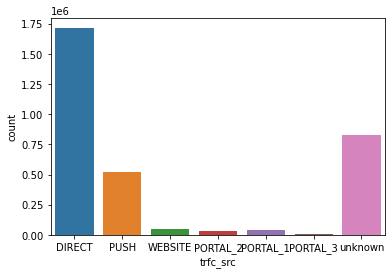

In [36]:
sns.countplot(df_activation['trfc_src'])

유입 채널입니다.

직접 유입이 가장 많고, 그 다음에 알 수 없고 드고, push가 그 다음이네요. website나 portal.. 은 별로 없는 것 같습니다.

직접 유입에 힘쓰는 것이 좋겠군요!!

#### `dvc_ctg_nm`



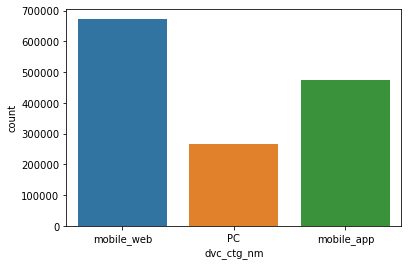

In [37]:
sns.countplot(df_activation['dvc_ctg_nm'])

역시 모바일로 보는 것이 가장 많은 수를 차지합니다.

모바일에서도 web을 통해 접근하는 것이 많네요. 웹을 좀 더 보강해야할 필요가 있겠습니다.

---

이제 무엇을 더 할 수 있을지 한번 살펴봅시다.

1. 세션 일자를 일단 `datetime`으로 바꿔주는 것도 좋을 것 같습니다.
2. `trans_id`는 거래정보 데이터 프레임과 합쳐주는 것이 좋을 것 같습니다.
3. `clnt_id`로 고객 정보 데이터 프레임도 합쳐주는 것이 좋을 것 같습니다.
4. 거래정보에 있는 상품 소분류코드로 상품 분류 정보도 더해줍시다.

#### 세션일자 datetime으로 바꾸기

In [38]:
df_activation['sess_date'] = pd.to_datetime(df_activation['sess_dt'], format='%Y%m%d')
df_activation.dtypes

clnt_id                     int64
sess_id                     int64
hit_seq                     int64
action_type                 int64
biz_unit                   object
sess_dt                     int64
hit_tm                     object
hit_pss_tm                  int64
trans_id                  float64
sech_kwd                   object
tot_pag_view_ct           float64
tot_sess_hr_v             float64
trfc_src                   object
dvc_ctg_nm                 object
sess_date          datetime64[ns]
dtype: object

바꿔주었습니다!! 이제 다른 데이터프레임의 정보를 더해줍시다.

In [39]:
df = pd.merge(df_activation, df_demo, on='clnt_id', how='left')
df.head()

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm,sess_date,clnt_gender,clnt_age
0,7809,1,8,5,A03,20190913,01:16,2571103,NaN,NaN,34.0,2663.0,DIRECT,NaN,2019-09-13,unknown,unknown
1,7809,1,4,2,A03,20190913,01:14,2485909,NaN,NaN,34.0,2663.0,DIRECT,NaN,2019-09-13,unknown,unknown
2,7809,1,11,5,A03,20190913,01:17,2646597,NaN,NaN,34.0,2663.0,DIRECT,NaN,2019-09-13,unknown,unknown
3,7809,1,1,2,A03,20190913,00:46,788304,NaN,NaN,34.0,2663.0,DIRECT,NaN,2019-09-13,unknown,unknown
4,7809,1,9,5,A03,20190913,01:17,2617609,NaN,NaN,34.0,2663.0,DIRECT,NaN,2019-09-13,unknown,unknown


In [40]:
df = pd.merge(df, df_transaction, on='trans_id', how='left')
df.head()

,clnt_id_x,sess_id,hit_seq,action_type,biz_unit_x,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,...,clnt_age,clnt_id_y,trans_seq,biz_unit_y,pd_c,de_dt,de_tm,buy_am,buy_ct,date
0,7809,1,8,5,A03,20190913,01:16,2571103,NaN,NaN,...,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,7809,1,4,2,A03,20190913,01:14,2485909,NaN,NaN,...,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,7809,1,11,5,A03,20190913,01:17,2646597,NaN,NaN,...,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,7809,1,1,2,A03,20190913,00:46,788304,NaN,NaN,...,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,7809,1,9,5,A03,20190913,01:17,2617609,NaN,NaN,...,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [41]:
df_category['pd_c'] = df_category['pd_c'].astype(str)
df = pd.merge(df, df_category, on='pd_c', how='left')
df.head()

,clnt_id_x,sess_id,hit_seq,action_type,biz_unit_x,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,...,biz_unit_y,pd_c,de_dt,de_tm,buy_am,buy_ct,date,clac_nm1,clac_nm2,clac_nm3
0,7809,1,8,5,A03,20190913,01:16,2571103,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
1,7809,1,4,2,A03,20190913,01:14,2485909,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
2,7809,1,11,5,A03,20190913,01:17,2646597,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
3,7809,1,1,2,A03,20190913,00:46,788304,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
4,7809,1,9,5,A03,20190913,01:17,2617609,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN


열심히 합쳐보았습니다. 

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3299190 entries, 0 to 3299189
Data columns (total 29 columns):
 #   Column           Dtype         
---  ------           -----         
 0   clnt_id_x        int64         
 1   sess_id          int64         
 2   hit_seq          int64         
 3   action_type      int64         
 4   biz_unit_x       object        
 5   sess_dt          int64         
 6   hit_tm           object        
 7   hit_pss_tm       int64         
 8   trans_id         float64       
 9   sech_kwd         object        
 10  tot_pag_view_ct  float64       
 11  tot_sess_hr_v    float64       
 12  trfc_src         object        
 13  dvc_ctg_nm       object        
 14  sess_date        datetime64[ns]
 15  clnt_gender      object        
 16  clnt_age         object        
 17  clnt_id_y        float64       
 18  trans_seq        float64       
 19  biz_unit_y       object        
 20  pd_c             object        
 21  de_dt            float64       

In [43]:
df.isnull().sum()

clnt_id_x                0
sess_id                  0
hit_seq                  0
action_type              0
biz_unit_x               0
sess_dt                  0
hit_tm                   0
hit_pss_tm               0
trans_id           3139373
sech_kwd           2647552
tot_pag_view_ct       1428
tot_sess_hr_v        57769
trfc_src                 0
dvc_ctg_nm         1862207
sess_date                0
clnt_gender              0
clnt_age                 0
clnt_id_y          3171832
trans_seq          3171832
biz_unit_y         3171832
pd_c               3171832
de_dt              3171832
de_tm              3171832
buy_am             3171832
buy_ct             3171832
date               3171832
clac_nm1           3248217
clac_nm2           3248217
clac_nm3           3248217
dtype: int64

In [44]:
df.drop(['clnt_id_y', 'biz_unit_y'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3299190 entries, 0 to 3299189
Data columns (total 27 columns):
 #   Column           Dtype         
---  ------           -----         
 0   clnt_id_x        int64         
 1   sess_id          int64         
 2   hit_seq          int64         
 3   action_type      int64         
 4   biz_unit_x       object        
 5   sess_dt          int64         
 6   hit_tm           object        
 7   hit_pss_tm       int64         
 8   trans_id         float64       
 9   sech_kwd         object        
 10  tot_pag_view_ct  float64       
 11  tot_sess_hr_v    float64       
 12  trfc_src         object        
 13  dvc_ctg_nm       object        
 14  sess_date        datetime64[ns]
 15  clnt_gender      object        
 16  clnt_age         object        
 17  trans_seq        float64       
 18  pd_c             object        
 19  de_dt            float64       
 20  de_tm            object        
 21  buy_am           float64       

In [45]:
df.isnull().sum()

clnt_id_x                0
sess_id                  0
hit_seq                  0
action_type              0
biz_unit_x               0
sess_dt                  0
hit_tm                   0
hit_pss_tm               0
trans_id           3139373
sech_kwd           2647552
tot_pag_view_ct       1428
tot_sess_hr_v        57769
trfc_src                 0
dvc_ctg_nm         1862207
sess_date                0
clnt_gender              0
clnt_age                 0
trans_seq          3171832
pd_c               3171832
de_dt              3171832
de_tm              3171832
buy_am             3171832
buy_ct             3171832
date               3171832
clac_nm1           3248217
clac_nm2           3248217
clac_nm3           3248217
dtype: int64

일단 합치기는 했는데, 결측치가 엄청나죠?

아마도 구매를 하지 않은 것들에 대한 데이터들이 들어가서 그런 것 같습니다. 위에서 확인했다싶이 실제 구매까지(transaction까지) 이루어진 경우가 많지 않기 때문이죠. 

결측치를 어떻게 해줄까요? 따로 분리를 해줄까요?!

In [46]:
CLASSES = df['clac_nm1'].unique()
CLASSES

array([nan, 'Vegetables', 'Substitute Foods', 'Snack Foods',
       'Spices / Seasonings', 'Tableware / Cooking Utensils', 'Sea Foods',
       'Personal Care', 'Outdoor / Leisure Activities',
       'Tools / Safety Supplies',
       'Underwear / Socks and Hosiery / Homewear', 'Toy',
       'Others (Non-Products)', "Women's Clothing", 'Sport Fashion',
       'Refrigerators and Washing Machines',
       'Stationary / Office Supplies', 'Seasonal Sports',
       'Travel / Leisure Services', "Men's Clothing", 'Other Products',
       'Video / Audio System Electronics'], dtype=object)

In [47]:
import numpy as np

cl_agg = np.asarray([[label, (df == index).sum()] for index, label in enumerate(CLASSES)])

이렇게 무작정 합쳐버리니 너무 무식하네여. 거래가 있는것과 없는것을 구분해서 합쳐주는 방식을 취해봅시다!

In [48]:
df.head()

,clnt_id_x,sess_id,hit_seq,action_type,biz_unit_x,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,...,trans_seq,pd_c,de_dt,de_tm,buy_am,buy_ct,date,clac_nm1,clac_nm2,clac_nm3
0,7809,1,8,5,A03,20190913,01:16,2571103,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
1,7809,1,4,2,A03,20190913,01:14,2485909,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
2,7809,1,11,5,A03,20190913,01:17,2646597,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
3,7809,1,1,2,A03,20190913,00:46,788304,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
4,7809,1,9,5,A03,20190913,01:17,2617609,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN


In [49]:
noTransaction = df[df['trans_id'].isnull() == True]
noTransaction.head()

,clnt_id_x,sess_id,hit_seq,action_type,biz_unit_x,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,...,trans_seq,pd_c,de_dt,de_tm,buy_am,buy_ct,date,clac_nm1,clac_nm2,clac_nm3
0,7809,1,8,5,A03,20190913,01:16,2571103,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
1,7809,1,4,2,A03,20190913,01:14,2485909,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
2,7809,1,11,5,A03,20190913,01:17,2646597,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
3,7809,1,1,2,A03,20190913,00:46,788304,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
4,7809,1,9,5,A03,20190913,01:17,2617609,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN


In [51]:
withTransaction = df[df['trans_id'].isnull() == False]
withTransaction.head()

,clnt_id_x,sess_id,hit_seq,action_type,biz_unit_x,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,...,trans_seq,pd_c,de_dt,de_tm,buy_am,buy_ct,date,clac_nm1,clac_nm2,clac_nm3
105,28304,1,22,6,A03,20190716,11:41,1212297,51903.0,NaN,...,6.0,1568,20190716.0,11:41,1000.0,1.0,2019-07-16 11:41:00,Vegetables,Fruit Vegetables,Eggplants
106,28304,1,22,6,A03,20190716,11:41,1212297,51903.0,NaN,...,7.0,1583,20190716.0,11:41,1000.0,1.0,2019-07-16 11:41:00,Vegetables,Leaf Vegetables,Korean Lettuces
107,28304,1,22,6,A03,20190716,11:41,1212297,51903.0,NaN,...,5.0,1625,20190716.0,11:41,1290.0,1.0,2019-07-16 11:41:00,Vegetables,Western Vegetables,Lettuces
108,28304,1,22,6,A03,20190716,11:41,1212297,51903.0,NaN,...,8.0,1394,20190716.0,11:41,100.0,1.0,2019-07-16 11:41:00,Substitute Foods,Instant Noodles,Bibim Ramens
109,28304,1,22,6,A03,20190716,11:41,1212297,51903.0,NaN,...,1.0,0515,20190716.0,11:41,7980.0,1.0,2019-07-16 11:41:00,NaN,NaN,NaN


In [52]:
print(noTransaction.shape)
print(withTransaction.shape)

(3139373, 27)
(159817, 27)


키워드 검색한거에서 같은 키워드를 검색했으면 그것들에 대한 정보를 넣어주고싶네요. 흠.. 한번 해봅시다!

In [60]:
withTransaction['sech_kwd'].isnull().sum()

159817

충격적.. trans 내용에는 모두 null값이 들어가네요. 다시 한번 봐볼까요!!

In [61]:
noTransaction.isnull().sum()

clnt_id_x                0
sess_id                  0
hit_seq                  0
action_type              0
biz_unit_x               0
sess_dt                  0
hit_tm                   0
hit_pss_tm               0
trans_id           3139373
sech_kwd           2487735
tot_pag_view_ct       1420
tot_sess_hr_v        57186
trfc_src                 0
dvc_ctg_nm         1761351
sess_date                0
clnt_gender              0
clnt_age                 0
trans_seq          3139373
pd_c               3139373
de_dt              3139373
de_tm              3139373
buy_am             3139373
buy_ct             3139373
date               3139373
clac_nm1           3139373
clac_nm2           3139373
clac_nm3           3139373
dtype: int64

여기서 trans_id는 다 지워줘도 될 것 같습니다.
밑에 `trans_seq`부터 `clac_nm3`도 마찬가지네요. 하하

transaction이 없는 경우에도 search term이 있는 경우는 많이 없긴 매한가지군요.

In [62]:
withTransaction.isnull().sum()

clnt_id_x               0
sess_id                 0
hit_seq                 0
action_type             0
biz_unit_x              0
sess_dt                 0
hit_tm                  0
hit_pss_tm              0
trans_id                0
sech_kwd           159817
tot_pag_view_ct         8
tot_sess_hr_v         583
trfc_src                0
dvc_ctg_nm         100856
sess_date               0
clnt_gender             0
clnt_age                0
trans_seq           32459
pd_c                32459
de_dt               32459
de_tm               32459
buy_am              32459
buy_ct              32459
date                32459
clac_nm1           108844
clac_nm2           108844
clac_nm3           108844
dtype: int64

검색 키워드는 하나도 없네요. 지워줍시다.. 구매했으면서 분류 코드가 없는 경우는 뭘까요? 

In [63]:
df_transaction.head()

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct,date
0,21922,104999,1,A03,unknown,20190920,12:41,5990,1,2019-09-20 12:41:00
1,21279,104907,4,A03,unknown,20190920,10:27,10900,1,2019-09-20 10:27:00
2,39423,105124,11,A03,unknown,20190920,17:26,12900,1,2019-09-20 17:26:00
3,18362,104010,1,A03,unknown,20190920,09:57,9900,1,2019-09-20 09:57:00
4,39423,105124,13,A03,0565,20190920,17:26,2990,1,2019-09-20 17:26:00


In [65]:
print(df_transaction.shape)
df_transaction.isnull().sum()

(599961, 10)


clnt_id      0
trans_id     0
trans_seq    0
biz_unit     0
pd_c         0
de_dt        0
de_tm        0
buy_am       0
buy_ct       0
date         0
dtype: int64

문제가 있습니다. 온라인 행동정보에서 모든 trans_id를 가지고있지 않은가 봅니다.

어쨌든, 우리는 두개의 모델을 만들어서 앙상블하는 방법을 취해봅시다.

In [66]:
Transaction = pd.merge(df_transaction, df_demo, on='clnt_id', how='left')
Transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599961 entries, 0 to 599960
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   clnt_id      599961 non-null  int64         
 1   trans_id     599961 non-null  int64         
 2   trans_seq    599961 non-null  int64         
 3   biz_unit     599961 non-null  object        
 4   pd_c         599961 non-null  object        
 5   de_dt        599961 non-null  int64         
 6   de_tm        599961 non-null  object        
 7   buy_am       599961 non-null  int64         
 8   buy_ct       599961 non-null  int64         
 9   date         599961 non-null  datetime64[ns]
 10  clnt_gender  599961 non-null  object        
 11  clnt_age     599961 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 59.5+ MB


In [68]:
Transaction = pd.merge(Transaction, df_category, on='pd_c', how='left')
Transaction.isnull().sum()

clnt_id             0
trans_id            0
trans_seq           0
biz_unit            0
pd_c                0
de_dt               0
de_tm               0
buy_am              0
buy_ct              0
date                0
clnt_gender         0
clnt_age            0
clac_nm1       361105
clac_nm2       361105
clac_nm3       361105
dtype: int64

In [70]:
df_category.isnull().sum()

pd_c        0
clac_nm1    0
clac_nm2    0
clac_nm3    2
dtype: int64

어디서 값이 없는 것이 생기는걸가요????? 

In [76]:
Transaction[Transaction['clac_nm1'].isnull() == False]

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct,date,clnt_gender,clnt_age,clac_nm1,clac_nm2,clac_nm3
30,58265,105113,5,A03,1566,20190920,16:53,2990,1,2019-09-20 16:53:00,M,40,Vegetables,Fruit Vegetables,Cucumbers
31,32198,105110,2,A03,1566,20190920,16:52,2990,1,2019-09-20 16:52:00,F,40,Vegetables,Fruit Vegetables,Cucumbers
32,33248,104809,2,A03,1573,20190920,00:34,1990,1,2019-09-20 00:34:00,F,30,Vegetables,Fruit Vegetables,Young Pumpkins
33,48969,104882,11,A03,1572,20190920,10:05,2980,2,2019-09-20 10:05:00,F,40,Vegetables,Fruit Vegetables,Sweet Pumpkins
34,44662,105112,11,A03,1571,20190920,16:55,990,1,2019-09-20 16:55:00,F,40,Vegetables,Fruit Vegetables,Peppers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599940,35777,4971,1,B03,1348,20190927,20:07,10000,1,2019-09-27 20:07:00,F,40,Stationary / Office Supplies,General Stationary / Office Supplies,Other General Stationary / Office Supplies
599945,33296,2372,1,B03,1057,20190927,18:19,6100,1,2019-09-27 18:19:00,F,20,Personal Care,Feminine Hygiene Goods,Tampons
599946,16091,5636,1,B03,1066,20190927,21:08,10500,1,2019-09-27 21:08:00,F,30,Personal Care,Hair Care,Hair Treatment / Packs
599952,28484,13342,1,B03,1060,20190927,15:47,5000,1,2019-09-27 15:47:00,F,50,Personal Care,Hair Care,Hair Essences


In [78]:
Transaction.head()

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct,date,clnt_gender,clnt_age,clac_nm1,clac_nm2,clac_nm3
0,21922,104999,1,A03,unknown,20190920,12:41,5990,1,2019-09-20 12:41:00,F,50,NaN,NaN,NaN
1,21279,104907,4,A03,unknown,20190920,10:27,10900,1,2019-09-20 10:27:00,F,40,NaN,NaN,NaN
2,39423,105124,11,A03,unknown,20190920,17:26,12900,1,2019-09-20 17:26:00,F,50,NaN,NaN,NaN
3,18362,104010,1,A03,unknown,20190920,09:57,9900,1,2019-09-20 09:57:00,F,40,NaN,NaN,NaN
4,39423,105124,13,A03,0565,20190920,17:26,2990,1,2019-09-20 17:26:00,F,50,NaN,NaN,NaN


In [80]:
noTransaction.isnull().sum()

clnt_id_x                0
sess_id                  0
hit_seq                  0
action_type              0
biz_unit_x               0
sess_dt                  0
hit_tm                   0
hit_pss_tm               0
trans_id           3139373
sech_kwd           2487735
tot_pag_view_ct       1420
tot_sess_hr_v        57186
trfc_src                 0
dvc_ctg_nm         1761351
sess_date                0
clnt_gender              0
clnt_age                 0
trans_seq          3139373
pd_c               3139373
de_dt              3139373
de_tm              3139373
buy_am             3139373
buy_ct             3139373
date               3139373
clac_nm1           3139373
clac_nm2           3139373
clac_nm3           3139373
dtype: int64

In [94]:
mean = noTransaction['tot_pag_view_ct'].mean()
noTransaction['tot_pag_view_ct'].fillna(mean, inplace=True)

/home/aiffel0039/anaconda3/envs/aiffel/lib/python3.7/site-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [97]:
noTransaction['tot_pag_view_ct'].value_counts()

1.0      61575
7.0      58963
5.0      58170
9.0      57717
11.0     56896
         ...  
429.0       21
431.0       21
433.0        9
423.0        6
389.0        2
Name: tot_pag_view_ct, Length: 426, dtype: int64

In [107]:
noTransaction['tot_sess_hr_v'].value_counts()

127.0     2194
61.0      2112
96.0      2085
63.0      2052
69.0      2049
          ... 
6812.0       1
5996.0       1
6800.0       1
6794.0       1
6612.0       1
Name: tot_sess_hr_v, Length: 6627, dtype: int64

In [110]:
noTransaction['tot_sess_hr_v'].median()

1201.0